In [1]:
from stardist.models import StarDist2D
from stardist.plot import render_label

import PIL
import matplotlib.pyplot as plt
import numpy as np

2023-08-10 13:08:03.299243: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-10 13:08:03.493768: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-10 13:08:03.497693: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-10 13:08:33.589967: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Load the model

In [2]:

model = StarDist2D.from_pretrained('2D_versatile_he')


Found model '2D_versatile_he' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.


# Load a test tile

In [3]:
image = PIL.Image.open("/omics/odcf/analysis/OE0585_projects/chromothripsis/histopathology/tiles/1024/TCGA/ffpe/TCGA-B0-5709-01Z-00-DX1/TCGA-B0-5709-01Z-00-DX1_30720_61440.jpg")
image_np = np.asarray(image)

# Infer

In [4]:

labels, _ = model.predict_instances(image_np/255.0)


Text(0.5, 1.0, 'prediction + input overlay')

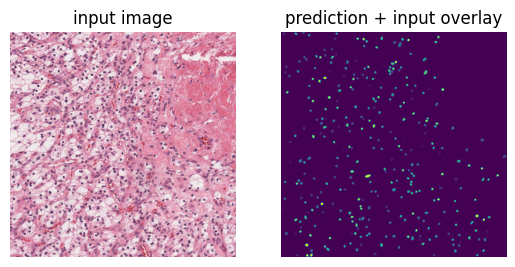

In [28]:
%matplotlib inline


plt.subplot(1,2,1)
plt.imshow(image_np/255.0, cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(labels)
plt.axis("off")
plt.title("prediction")
